**Introduction to networks**

In this chapter, you'll be introduced to fundamental concepts in network analytics while becoming acquainted with a real-world Twitter network dataset that you will explore throughout the course. In addition, you'll learn about NetworkX, a library that allows you to manipulate, analyze, and model graph data. You'll learn about different types of graphs as well as how to rationally visualize them.

In [1]:
import networkx as nx
import pickle
from datetime import date

In [2]:
with open('./ego-twitter.p', 'rb') as fileobj:
    T = pickle.load(fileobj)

# For later use
T_orig = T.copy()
n_T = len(T)

**Basics of NetworkX API, using Twitter network**

To get you up and running with the NetworkX API, we will run through some basic functions that let you query a Twitter network that has been pre-loaded for you and is available in the IPython Shell as T. The Twitter network comes from KONECT, and shows a snapshot of a subset of Twitter users. It is an anonymized Twitter network with metadata.

You're now going to use the NetworkX API to explore some basic properties of the network, and are encouraged to experiment with the data in the IPython Shell.

Wait for the IPython shell to indicate that the graph that has been preloaded under the variable name T (representing a Twitter network), and then answer the following question: 

What is the size of the graph T, the type of T.nodes(), and the data structure of the third element of the last entry of T.edges(data=True)? The len() and type() functions will be useful here. To access the last entry of T.edges(data=True), you can use T.edges(data=True)[-1].

In [3]:
len(T)

23369

In [4]:
T.nodes()[0:10]

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [5]:
type(T.nodes()[-1])

numpy.int64

In [6]:
T.nodes(data=True)[0:10]

[(1, {'category': 'I', 'occupation': 'scientist'}),
 (3, {'category': 'P', 'occupation': 'politician'}),
 (4, {'category': 'D', 'occupation': 'celebrity'}),
 (5, {'category': 'I', 'occupation': 'politician'}),
 (6, {'category': 'D', 'occupation': 'politician'}),
 (7, {'category': 'D', 'occupation': 'scientist'}),
 (8, {'category': 'I', 'occupation': 'celebrity'}),
 (9, {'category': 'D', 'occupation': 'celebrity'}),
 (10, {'category': 'I', 'occupation': 'celebrity'}),
 (11, {'category': 'I', 'occupation': 'celebrity'})]

In [7]:
type(T.nodes(data=True)[-1])

tuple

In [8]:
T.edges()[0:10]

[(1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12)]

In [9]:
type(T.edges()[-1])

tuple

In [10]:
T.edges(data=True)[0:10]

[(1, 3, {'date': datetime.date(2012, 11, 17)}),
 (1, 4, {'date': datetime.date(2007, 6, 19)}),
 (1, 5, {'date': datetime.date(2014, 3, 18)}),
 (1, 6, {'date': datetime.date(2007, 3, 18)}),
 (1, 7, {'date': datetime.date(2011, 12, 19)}),
 (1, 8, {'date': datetime.date(2013, 12, 7)}),
 (1, 9, {'date': datetime.date(2009, 11, 9)}),
 (1, 10, {'date': datetime.date(2008, 10, 7)}),
 (1, 11, {'date': datetime.date(2008, 8, 14)}),
 (1, 12, {'date': datetime.date(2011, 3, 22)})]

In [11]:
type(T.edges(data=True)[-1])

tuple

**Basic drawing of a network using NetworkX**

NetworkX provides some basic drawing functionality that works for small graphs. We have selected a subset of nodes from the graph for you to practice using NetworkX's drawing facilities. It has been pre-loaded as T_sub.

In [12]:
# Sub-sample the graph
T_sub = T_orig.copy()
T_sub.remove_nodes_from(list(range(48,n_T)))

C:\Users\44076529\AppData\Local\Continuum\Anaconda3\envs\py36\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\44076529\AppData\Local\Continuum\Anaconda3\envs\py36\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\44076529\AppData\Local\Continuum\Anaconda3\envs\py36\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\44076529\AppData\Local\Continuum\Anaconda3\envs\py36\lib\site-packages\

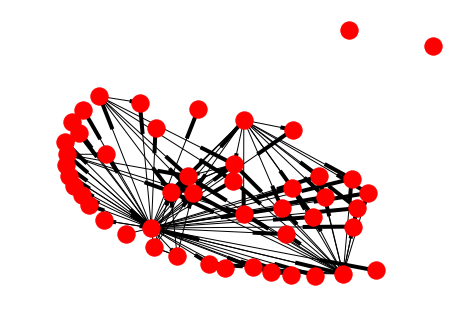

In [13]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Draw the graph to screen

nx.draw(T_sub)
plt.show()

**Queries on a graph**

Now that you know some basic properties of the graph and have practiced using NetworkX's drawing facilities to visualize components of it, it's time to explore how you can query it for nodes and edges. Specifically, you're going to look for "nodes of interest" and "edges of interest". To achieve this, you'll make use of the .nodes() and .edges() methods that Eric went over in the video. The .nodes() method returns a list of nodes, while the .edges() method returns a list of tuples, in which each tuple shows the nodes that are present on that edge. Recall that passing in the keyword argument data=True in these methods retrieves the corresponding metadata associated with the nodes and edges as well.

You'll write list comprehensions to effectively build these queries in one line. For a refresher on list comprehensions, refer to Part 2 of DataCamp's Python Data Science Toolbox course. Here's the recipe for a list comprehension:

[ output expression for iterator variable in iterable if predicate expression ]. 

You have to fill in the _iterable_ and the _predicate expression_. Feel free to prototype your answer by exploring the graph in the IPython Shell before submitting your solution.

In [14]:
T.edges(data=True)[0:5]

[(1, 3, {'date': datetime.date(2012, 11, 17)}),
 (1, 4, {'date': datetime.date(2007, 6, 19)}),
 (1, 5, {'date': datetime.date(2014, 3, 18)}),
 (1, 6, {'date': datetime.date(2007, 3, 18)}),
 (1, 7, {'date': datetime.date(2011, 12, 19)})]

In [15]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]

**Checking the un/directed status of a graph**

In the video, Eric described to you different types of graphs. Which type of graph do you think the Twitter network data you have been working with corresponds to? Use Python's built-in type() function in the IPython Shell to find out. The network, as before, has been pre-loaded as T. 

Of the four below choices below, which one corresponds to the type of graph that T is?

In [16]:
type(T)

networkx.classes.digraph.DiGraph

**Specifying a weight on edges**

Weights can be added to edges in a graph, typically indicating the "strength" of an edge. In NetworkX, the weight is indicated by the 'weight' key in the metadata dictionary.

Before attempting the exercise, use the IPython Shell to access the dictionary metadata of T and explore it, for instance by running the commands T.edge[1][10] and then T.edge[10][1]. Note how there's only one field, and now you're going to add another field, called 'weight'.

In [17]:
# Set the weight of the edge
T.edge[1][10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:
    
        # Set the weight to 1.1
        T.edge[u][v]['weight'] = 1.1

**Checking whether there are self-loops in the graph**

As Eric discussed, NetworkX also allows edges that begin and end on the same node; while this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.

It is useful to check for this before proceeding with further analyses, and NetworkX graphs provide a method for this purpose: .number_of_selfloops().

In this exercise as well as later ones, you'll find the assert statement useful. An assert-ions checks whether the statement placed after it evaluates to True, otherwise it will return an AssertionError.

To begin, use the .number_of_selfloops() method on T in the IPython Shell to get the number of edges that begin and end on the same node. A number of self-loops have been synthetically added to the graph. Your job in this exercise is to write a function that returns these edges.

In [18]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []
    
    # Iterate over all the edges of G
    for u, v in G.edges():
    
    # Check if node u and node v are the same
        if u == v:
        
            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)
            
    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

**Visualizing using Matrix plots**

It is time to try your first "fancy" graph visualization method: a matrix plot. To do this, nxviz provides a MatrixPlot object.

nxviz is a package for visualizing graphs in a rational fashion. Under the hood, the MatrixPlot utilizes nx.to_numpy_matrix(G), which returns the matrix form of the graph. Here, each node is one column and one row, and an edge between the two nodes is indicated by the value 1. In doing so, however, only the weight metadata is preserved; all other metadata is lost, as you'll verify using an assert statement.

A corresponding nx.from_numpy_matrix(A) allows one to quickly create a graph from a NumPy matrix. The default graph type is Graph(); if you want to make it a DiGraph(), that has to be specified using the create_using keyword argument, e.g. (nx.from_numpy_matrix(A, create_using=nx.DiGraph)).

One final note, matplotlib.pyplot and networkx have already been imported as plt and nx, respectively, and the graph T has been pre-loaded. For simplicity and speed, we have sub-sampled only 100 edges from the network.

In [19]:
# Sub-sample the graph
T = T_orig.copy()
T.remove_nodes_from(list(range(190,n_T)))

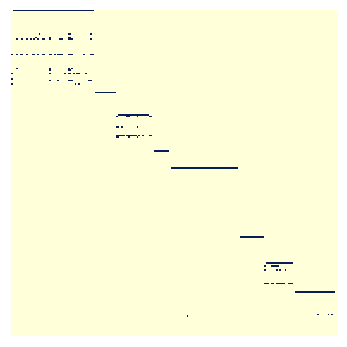

In [20]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Import nxviz
import nxviz as nv

# Create the MatrixPlot object: m
m = nv.MatrixPlot(T)

# Draw m to the screen
m.draw()

# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

**Visualizing using Circos plots**

Circos plots are a rational, non-cluttered way of visualizing graph data, in which nodes are ordered around the circumference in some fashion, and the edges are drawn within the circle that results, giving a beautiful as well as informative visualization about the structure of the network.

In this exercise, you'll continue getting practice with the nxviz API, this time with the CircosPlot object. matplotlib.pyplot has been imported for you as plt.

In [21]:
# Sub-sample the graph
T = T_orig.copy()
T.remove_nodes_from(list(range(190,n_T)))

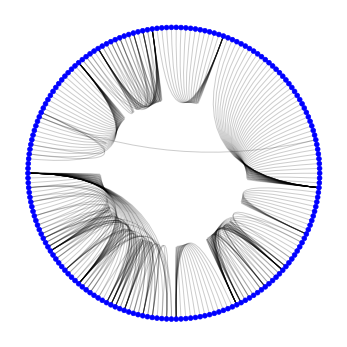

In [22]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(T)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()